Individual Assignment 2 Task 2
---
---

Name: Ryan Hong Yang Tan

UOW ID: 8560341

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

# Reading the csv file
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/magic04.data', sep=',', names=col_names)
# Checking if the data size is correct
print(len(data))

Mounted at /content/drive
19020


In [2]:
print(data.isnull().sum())

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [4]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
# Splitting features and target
X = data.iloc[:, :-1].values  # Features
y = (data.iloc[:, -1] == 'g').astype(int).values  # Convert 'g' to 1, 'h' to 0

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))

12680
6340


In [6]:
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, layers=2, neurons=64, reg_param=0.01, batch_size=32, epochs=20):
        self.layers = layers
        self.neurons = neurons
        self.reg_param = reg_param
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = self._build_model()
        self.history = None  # To store training history

    def _build_model(self):
        model = Sequential()
        model.add(keras.Input(shape=(X_train.shape[1],)))
        model.add(Dense(self.neurons, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(self.reg_param, self.reg_param)))
        model.add(Dropout(0.5))

        for _ in range(self.layers - 1):
            model.add(Dense(self.neurons, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(self.reg_param, self.reg_param)))
            model.add(Dropout(0.5))

        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.history = self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0, validation_data=(X_test, y_test)) # Includes validation_data
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        return (y_pred > 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [7]:
# Define hyperparameter grid
param_grid = {
    'layers': [2, 3], # hidden layers
    'neurons': [32, 64, 128], # neurons
    'reg_param': [0.001, 0.01], # regularization
    'batch_size': [32, 64],
    'epochs': [20]
}

# Perform GridSearchCV
model = KerasClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1, verbose=1, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_result.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [8]:
# Evaluate on test set
best_model = grid_result.best_estimator_

In [9]:
# Training loss values per epoch
training_loss_history = best_model.history.history['loss']
print("\nTraining loss per epoch:")
for epoch, loss_value in enumerate(training_loss_history, 1):
    print(f"Epoch {epoch}: {loss_value:.4f}")


Training loss per epoch:
Epoch 1: 2.0925
Epoch 2: 0.6227
Epoch 3: 0.6165
Epoch 4: 0.6078
Epoch 5: 0.6023
Epoch 6: 0.6030
Epoch 7: 0.5979
Epoch 8: 0.6016
Epoch 9: 0.5974
Epoch 10: 0.5883
Epoch 11: 0.5920
Epoch 12: 0.5970
Epoch 13: 0.5947
Epoch 14: 0.5916
Epoch 15: 0.5901
Epoch 16: 0.5903
Epoch 17: 0.5887
Epoch 18: 0.5891
Epoch 19: 0.5861
Epoch 20: 0.5851


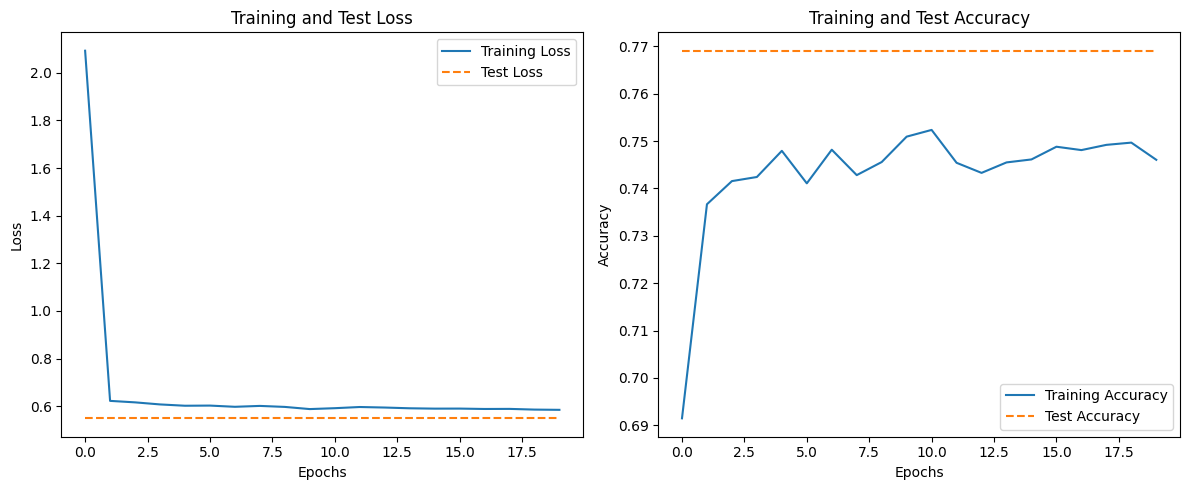

In [10]:
import matplotlib.pyplot as plt

# Get training history
history = best_model.history.history

# Evaluate on test set
test_loss, test_acc = best_model.model.evaluate(X_test, y_test, verbose=0)

# Plot Loss
plt.figure(figsize=(12, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot([test_loss] * len(history['loss']), label='Test Loss', linestyle='--')  # Horizontal line for test loss
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot([test_acc] * len(history['accuracy']), label='Test Accuracy', linestyle='--')  # Horizontal line for test accuracy
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [11]:
# Generate classification report (training set)
y_pred_train = best_model.predict(X_train)
report_train = classification_report(y_train, y_pred_train)
print(report_train)

397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.46      0.60      4459
           1       0.76      0.96      0.85      8221

    accuracy                           0.78     12680
   macro avg       0.81      0.71      0.72     12680
weighted avg       0.80      0.78      0.76     12680



In [12]:
# Generate classification report (test set)
y_pred_test = best_model.predict(X_test)
report_test = classification_report(y_test, y_pred_test)
print(report_test)

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.42      0.56      2229
           1       0.75      0.96      0.84      4111

    accuracy                           0.77      6340
   macro avg       0.80      0.69      0.70      6340
weighted avg       0.79      0.77      0.74      6340



**Explanation on my ANN Architecture**

The model is a feedforward neural network with structure as follow:

Input Layer: Matches size of number of feature (10 in this case)

Hidden Layers:


*   Number of Layers: 2 or 3
*   Neurons per Layer: 32, 64, or 128
*   Activation: relu
*   Regularization: 0.001 or 0.01
*   Dropout: 50% after each hidden layer to reduce overfitting

Output Layer: 1 neuron with sigmoid activation for binary classification

Optimization:

*   Loss Function: Binary cross-entropy
*   Optimizer: Adam
*   Batch Size: 32 or 64
*   Epochs: 20

Best Parameters: {'batch_size': 32, 'epochs': 20, 'layers': 2, 'neurons': 64, 'reg_param': 0.01}

**Explanation of result**

Based on my result, both labels have similar prediction score.

However, there is a large disparaity in recall score with label 0 having way lower compared to 1. This could be due to the large difference in support resulting the model to be more skewed towards label 1.

Overall the model accuracy is pretty decent at 0.77, however it could be higher with a more balanced dataset.